# Time Series Analysis and Forecasting with ARIMA 

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# close warnings
warnings.filterwarnings('ignore')


In [3]:
# load dataset
data = pd.read_csv("daily-total-female-births-CA.csv")
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

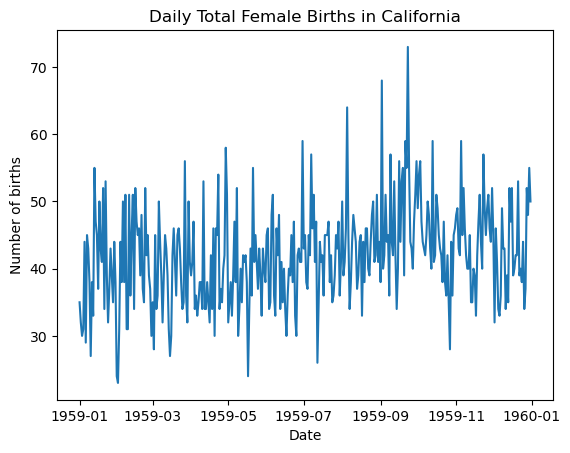

In [5]:
# plot the time series
# The plot helps us visualize the data and provides initial insights into its properties, like trends and seasonality.
plt.plot(data["births"])
plt.title('Daily Total Female Births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

## Testing for Stationarity
We use the Augmented Dickey-Fuller (ADF) test to check for stationarity:

In [6]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data["births"])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.808291
p-value: 0.000052


A p-value below 0.05 indicates stationarity, and our data meets this criterion, so we do not need to difference it.

## Finding ARIMA Parameters
We use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to find the ARIMA parameters.

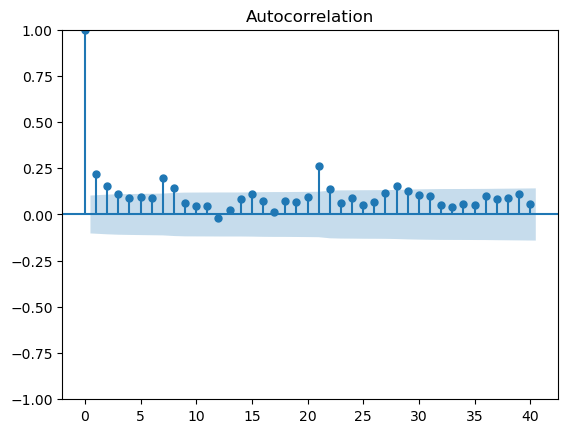

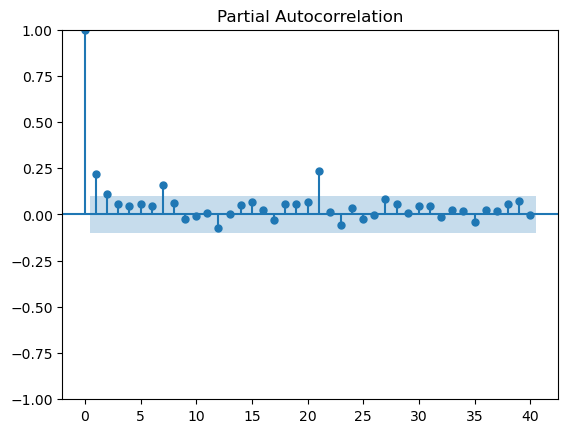

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['births'], lags=40)
plot_pacf(data['births'], lags=40)
plt.show()

These plots suggest that an ARIMA(1, 0, 1) model may be a good starting point.

## Building the ARIMA Model


In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['births'], order=(1, 0, 1))
model_fit = model.fit()

## Training and Forecasting
We train the model on the data and perform a forecast.

In [9]:
forecast = model_fit.get_forecast(steps=30)

Then we visualize the forecast alongside the historical data.

## Model Evaluation
To assess the model, we perform a retrospective forecast.

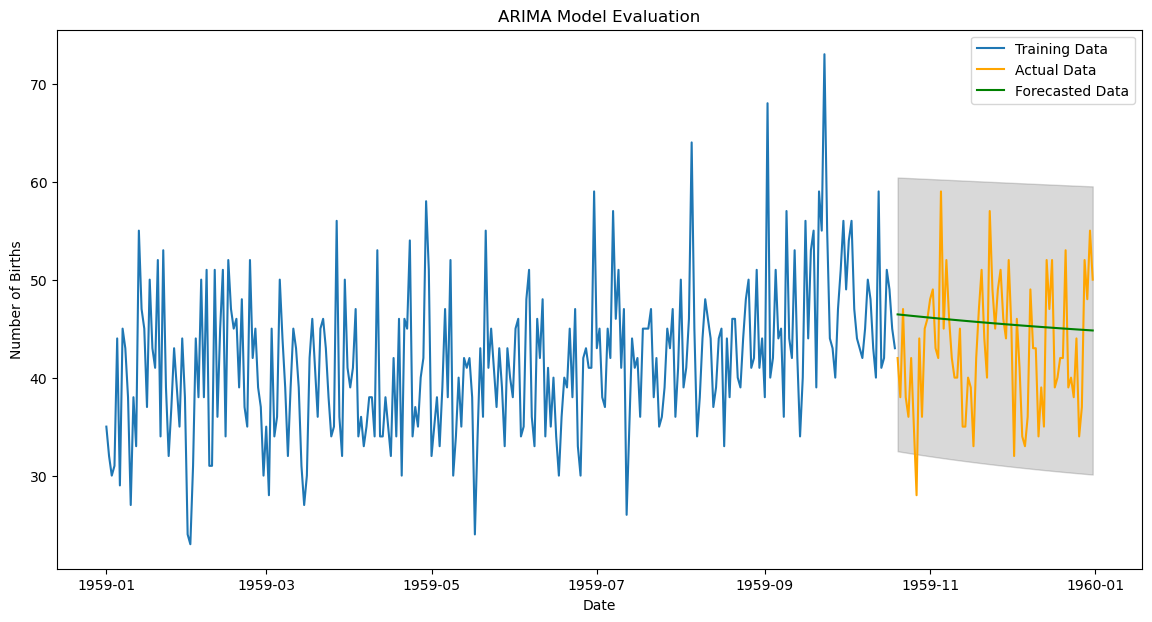

RMSE: 6.970853384078948


In [10]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test["births"], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['births'], label='Training Data')
plt.plot(test['births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)

The RMSE gives an indication of the forecast accuracy, with lower values indicating better fit. Whether this level of error is acceptable depends on the specific context in which the model is being used.